<a href="https://colab.research.google.com/github/junweiluo/HandsonMLPractice/blob/master/Chapter14Ex08_Conv2dTranspose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import Conv2D, Conv2DTranspose
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [0]:
# Model configuration
img_width, img_height = 28, 28
batch_size = 1000
no_epochs = 25
no_classes = 10
validation_split = 0.2
verbosity = 1

In [3]:
# Load MNIST dataset
(input_train, target_train), (input_test, target_test) = mnist.load_data()
# Reshape data
input_train = input_train.reshape(input_train.shape[0], img_width, img_height, 1)
input_test = input_test.reshape(input_test.shape[0], img_width, img_height, 1)
input_shape = (img_width, img_height, 1)
# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')
# Normalize data
input_train = input_train / 255
input_test = input_test / 255

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=input_shape))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2DTranspose(8, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2DTranspose(16, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2DTranspose(32, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same'))

In [5]:
input_train.shape

(60000, 28, 28, 1)

In [0]:
# Compile and fit data
model.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:
model.fit(input_train, input_train,                
          epochs=no_epochs,                
          batch_size=batch_size,                
          validation_split=validation_split)

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 11s 227us/step - loss: 0.3562 - val_loss: 0.1020
Epoch 2/25
48000/48000 [==============================] - 3s 60us/step - loss: 0.0841 - val_loss: 0.0762
Epoch 3/25
48000/48000 [==============================] - 3s 60us/step - loss: 0.0719 - val_loss: 0.0696
Epoch 4/25
48000/48000 [==============================] - 3s 60us/step - loss: 0.0676 - val_loss: 0.0668
Epoch 5/25
48000/48000 [==============================] - 3s 61us/step - loss: 0.0657 - val_loss: 0.0656
Epoch 6/25
48000/48000 [==============================] - 3s 61us/step - loss: 0.0646 - val_loss: 0.0647
Epoch 7/25
48000/48000 [==============================] - 3s 61us/step - loss: 0.0639 - val_loss: 0.0642
Epoch 8/25
48000/48000 [==============================] - 3s 61us/step - loss: 0.0635 - val_loss: 0.0635
Epoch 9/25
48000/48000 [==============================] - 3s 61us/step - loss: 0.0629 - val_loss: 0.0632
Epo

In [0]:
# Generate reconstructions
num_reconstructions = 8
samples = input_test[:num_reconstructions]
targets = target_test[:num_reconstructions]
reconstructions = model.predict(samples)

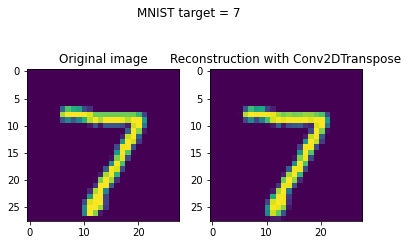

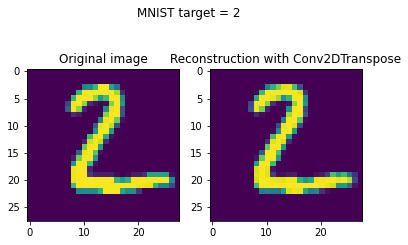

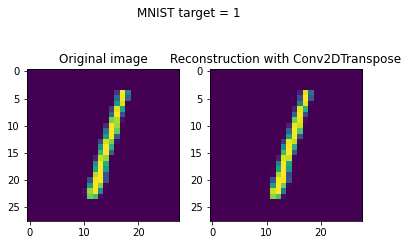

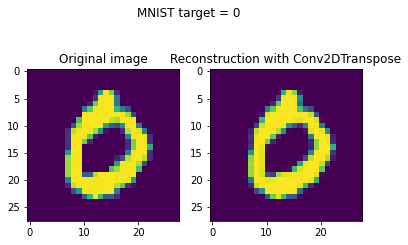

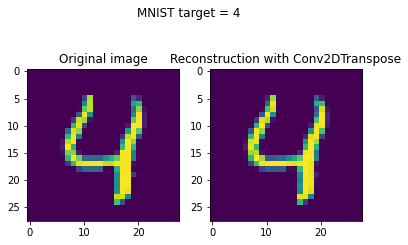

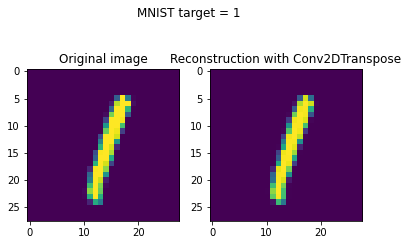

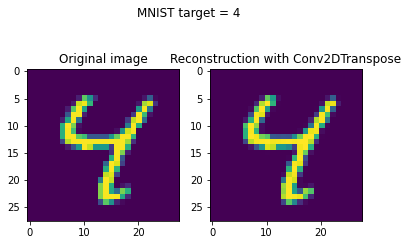

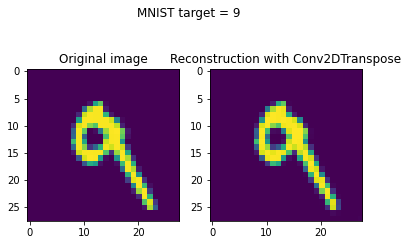

In [9]:
# Plot reconstructions
for i in np.arange(0, num_reconstructions):  
  # Get the sample and the reconstruction  
  sample = samples[i][:, :, 0]  
  reconstruction = reconstructions[i][:, :, 0]  
  input_class = targets[i]  
  # Matplotlib preparations  
  fig, axes = plt.subplots(1, 2)  
  # Plot sample and reconstruciton  
  axes[0].imshow(sample)  
  axes[0].set_title('Original image')  
  axes[1].imshow(reconstruction)  
  axes[1].set_title('Reconstruction with Conv2DTranspose')  
  fig.suptitle(f'MNIST target = {input_class}')  
  plt.show()